# New  dataset

In [385]:
import pandas as pd
import os
from tqdm import tqdm

def combine_files_with_index_check(folders, target_files, output_file=None):
    final_df = pd.DataFrame()
    stats = {'total_folders': 0, 'processed_folders': 0, 'errors': 0}
    
    print(f"Обработка {len(folders)} папок...")
    
    for folder in tqdm(folders):
        stats['total_folders'] += 1
        folder_data = {}
        index_ref = None
        valid_folder = True

        for file_name in target_files:
            file_path = os.path.join(folder, file_name)
            
            try:
                if os.path.exists(file_path):
                    df = pd.read_csv(file_path, sep=' ', header=None, engine='python')
                    
                    if len(df.columns) != 7:
                        print(f"\nОшибка в {file_path}: ожидается 7 колонок, получено {len(df.columns)}")
                        valid_folder = False
                        break
                        
                    df = df.set_index(0)
                    
                    if index_ref is None:
                        index_ref = df.index
                    elif not index_ref.equals(df.index):
                        print(f"\nНесовпадение индексов в {file_path}")
                        valid_folder = False
                        break
                        
                    folder_data[file_name] = df
                    
            except Exception as e:
                print(f"\nОшибка чтения {file_path}: {str(e)}")
                valid_folder = False
                break
        
        if valid_folder and len(folder_data) == len(target_files):
            try:
                combined = pd.concat([
                    # folder_data['DriveTorque.txt'],
                    folder_data['GearTorque.txt'],
                    folder_data['Joints.txt'],
                    folder_data['RobotPositions.txt'],
                    folder_data['MeasuredPositionsLeica.txt']
                ], axis=1)

                final_df = pd.concat([final_df, combined], axis=0)
                stats['processed_folders'] += 1
                
            except Exception as e:
                print(f"\nОшибка объединения в {folder}: {str(e)}")
                stats['errors'] += 1
    
    if not final_df.empty:
        column_names = (
            # [f'DriveTorque_{i}' for i in range(1, 7)] +
            [f'GearTorque_{i}' for i in range(1, 7)] +
            [f'Joints_{i}' for i in range(1, 7)] +
            [f'RobotPositions_{i}' for i in range(1, 7)] +
            [f'MeasuredPositionsLeica_{i}' for i in range(1, 7)]
        )
        
        final_df.columns = column_names
        
        # Сохранение
        if output_file:
            try:
                final_df.to_csv(output_file, index=True)
                print(f"\nРезультат сохранен в {output_file}")
            except Exception as e:
                print(f"\nОшибка сохранения: {str(e)}")
    
    # Статистика
    print("\nСтатистика:")
    print(f"Успешно обработано папок: {stats['processed_folders']}/{stats['total_folders']}")
    print(f"Ошибок: {stats['errors']}")
    print(f"Итоговый размер: {final_df.shape} (ожидается 31 колонок)")
    
    return final_df


target_files = ['GearTorque.txt', 'Joints.txt', 'RobotPositions.txt', 'MeasuredPositionsLeica.txt']
folders = [
    '../calibS-1/',
    '../data/collect800Points100-20-110/'
    # '../data/calibF/',
    # '../data/robLocate/',
    # '../data/spiraltestS/'
]




In [386]:
result = combine_files_with_index_check(
    folders=folders,
    target_files=target_files,
    output_file='combined_results.csv'
)


Обработка 2 папок...


100%|██████████| 2/2 [00:00<00:00, 11.49it/s]



Результат сохранен в combined_results.csv

Статистика:
Успешно обработано папок: 2/2
Ошибок: 0
Итоговый размер: (969, 24) (ожидается 31 колонок)


# убрать наблюдение, оставить номинальные позиции

In [371]:
# result2 = result.drop(result.columns[-6:],axis=1)
# # result2 = result2.drop(['RobotPositions_4','RobotPositions_5'],axis=1)
# from sklearn.preprocessing import StandardScaler

# cols = result2.columns
# idx = result2.index

# scaler = StandardScaler()
# result2_scaled = pd.DataFrame(scaler.fit_transform(result2), columns=cols, index=idx)

# Убрать номинальные позиции, оставить наблюдение

In [390]:
result_laser = result.drop(result.columns[-12:-6],axis=1)
# result2 = result2.drop(['RobotPositions_4','RobotPositions_5'],axis=1)
from sklearn.preprocessing import StandardScaler

cols = result_laser.columns
idx = result_laser.index

scaler = StandardScaler()
result_laser_scaled = pd.DataFrame(scaler.fit_transform(result_laser), columns=cols, index=idx)

In [391]:
result_laser_scaled

,GearTorque_1,GearTorque_2,GearTorque_3,GearTorque_4,GearTorque_5,GearTorque_6,Joints_1,Joints_2,Joints_3,Joints_4,Joints_5,Joints_6,MeasuredPositionsLeica_1,MeasuredPositionsLeica_2,MeasuredPositionsLeica_3,MeasuredPositionsLeica_4,MeasuredPositionsLeica_5,MeasuredPositionsLeica_6
0,,,,,,,,,,,,,,,,,,
0,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.516090,0.661132,-0.554616,-0.497819,1.046256,0.475313,1.932069,1.443419,0.051235,-2.468866,2.505204,2.442216
1,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.574982,0.716390,-0.615790,-0.083585,1.301601,-0.038161,1.891380,1.437827,0.052303,4.905293,2.545895,2.452202
2,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.408244,0.874567,-0.878711,-1.037863,1.763425,1.193975,2.000511,1.526899,0.044096,-1.677802,2.444013,2.390557
3,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.523571,1.956816,-2.829510,-0.496758,3.004048,0.464122,2.066660,1.515765,-0.062080,-2.648768,1.081958,2.556252
4,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.521127,0.821205,0.191493,1.135967,2.095994,-1.238523,1.767852,1.339372,-0.145167,-2.489887,4.226385,2.420575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.852396,1.483953,0.472155,-2.264672,1.005893,1.236183,-4.968435,1.233317,-0.319214,0.550772,-1.252626,-0.099666,-1.773591,2.016894,-1.239830,0.360226,-0.401097,-0.416880
826,1.150643,1.732158,1.003633,-2.443426,1.036353,1.272303,-4.921897,1.422308,-0.313729,0.548170,-1.252220,-0.047501,-1.775346,2.188830,-1.511085,0.362240,-0.401003,-0.419808
827,1.054572,1.957261,-0.415100,0.306759,-1.803871,1.265186,-4.875388,1.636184,-0.353487,0.549247,-1.256512,-0.002147,-1.777176,2.360652,-1.782526,0.365382,-0.400746,-0.424841


# Remove outliers

In [392]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.1)
    Q3 = df[column].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Применяем к нужным столбцам
for col in result_laser_scaled.columns:
    result_laser_scaled = remove_outliers_iqr(result_laser_scaled, col)

train_df

,GearTorque_1,GearTorque_2,GearTorque_3,GearTorque_4,GearTorque_5,GearTorque_6,Joints_1,Joints_2,Joints_3,Joints_4,Joints_5,Joints_6,MeasuredPositionsLeica_1,MeasuredPositionsLeica_2,MeasuredPositionsLeica_3,MeasuredPositionsLeica_4,MeasuredPositionsLeica_5,MeasuredPositionsLeica_6
0,,,,,,,,,,,,,,,,,,
408,-1.443672,-0.075278,-1.054474,0.763246,-1.143686,-1.142703,0.335180,-0.564869,0.786028,0.594682,0.040191,-0.579430,-0.384767,-0.352711,-0.091659,0.349258,-0.399854,-0.401231
526,-1.312891,-0.201687,-1.060388,0.728065,1.178089,-1.281059,0.615499,-0.642098,0.672396,0.591824,-0.357643,-0.515327,-0.716930,0.020675,0.093566,0.347045,-0.400344,-0.397640
754,1.230241,1.642036,-0.465149,-1.818088,-2.040160,1.197806,1.017334,1.476204,-0.101704,0.353140,-0.653157,-0.035490,-1.457275,0.402245,-1.749322,0.352956,-0.400437,-0.406719
430,0.205648,0.217866,1.694367,-0.091229,-0.549634,0.357579,0.457652,-0.817247,2.050217,0.000642,-0.159212,0.132574,-0.341756,0.490331,-0.915898,0.347493,-0.399699,-0.398527
42,0.911891,1.005557,-0.282424,-0.197681,0.596641,1.127357,-0.497311,0.732032,0.217262,-1.326949,0.025684,1.189204,0.860631,-0.914896,-1.029838,0.350172,-0.400075,-0.402163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,-0.948521,-0.263968,-0.015972,1.849941,-1.097605,-1.083264,-0.484656,-0.092598,0.326862,-1.687749,-0.049017,1.599089,0.783714,-0.671801,-0.142269,0.349065,-0.399470,-0.400312
107,0.808320,0.337510,-0.902853,-0.366158,0.610515,1.246930,-0.322750,0.004205,0.682522,-1.379634,0.243805,1.304431,0.530072,-0.713485,-0.573239,0.352608,-0.399942,-0.405637
274,1.046730,0.840327,-0.399528,1.001901,2.084424,-0.886653,-0.026078,0.197072,1.248273,1.188707,1.143597,-1.289764,0.096525,-0.478545,-1.180540,0.357983,-0.399466,-0.413600


# form dataset

In [393]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(
    result_laser_scaled,
    test_size=0.3,          # Доля тестовой выборки (30%)
    random_state=42,        # Фиксируем случайность для воспроизводимости
    shuffle=True            # Перемешивание данных перед разбиением (по умолчанию True)
)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (656, 18)
Test shape: (282, 18)


In [394]:
from sklearn.linear_model import LinearRegression

X_train = train_df.loc[:, :'Joints_6']  # Признаки (колонки 0-17)
y_train = train_df.loc[:, 'MeasuredPositionsLeica_1':]  # Целевые (колонки 18-23)
X_test = test_df.loc[:, :'Joints_6'] 
y_test = test_df.loc[:, 'MeasuredPositionsLeica_1':]


In [377]:
y_train

,MeasuredPositionsLeica_1,MeasuredPositionsLeica_2,MeasuredPositionsLeica_3,MeasuredPositionsLeica_4,MeasuredPositionsLeica_5,MeasuredPositionsLeica_6
0,,,,,,
408,-0.384767,-0.352711,-0.091659,0.349258,-0.399854,-0.401231
526,-0.716930,0.020675,0.093566,0.347045,-0.400344,-0.397640
754,-1.457275,0.402245,-1.749322,0.352956,-0.400437,-0.406719
430,-0.341756,0.490331,-0.915898,0.347493,-0.399699,-0.398527
42,0.860631,-0.914896,-1.029838,0.350172,-0.400075,-0.402163
...,...,...,...,...,...,...
72,0.783714,-0.671801,-0.142269,0.349065,-0.399470,-0.400312
107,0.530072,-0.713485,-0.573239,0.352608,-0.399942,-0.405637
274,0.096525,-0.478545,-1.180540,0.357983,-0.399466,-0.413600


In [378]:
test_df

,GearTorque_1,GearTorque_2,GearTorque_3,GearTorque_4,GearTorque_5,GearTorque_6,Joints_1,Joints_2,Joints_3,Joints_4,Joints_5,Joints_6,MeasuredPositionsLeica_1,MeasuredPositionsLeica_2,MeasuredPositionsLeica_3,MeasuredPositionsLeica_4,MeasuredPositionsLeica_5,MeasuredPositionsLeica_6
0,,,,,,,,,,,,,,,,,,
701,1.159682,-1.948910,-0.277550,-2.164302,0.996080,1.314723,1.083389,-1.378208,0.861898,0.617740,-1.089886,-0.473695,-0.903203,1.202969,0.518820,0.345061,-0.400960,-0.394756
672,0.706850,-0.003004,0.779097,-0.762786,0.504602,0.839566,0.899054,-0.730198,0.319510,0.638013,-0.863355,-0.536774,-0.999324,0.548769,0.539797,0.344273,-0.400816,-0.393606
64,1.362723,0.427270,0.221126,1.477463,0.771346,-0.837859,-0.677360,-0.036292,0.668515,-1.484362,-0.195865,1.308887,1.008242,-0.277413,-0.519092,0.350998,-0.399370,-0.403088
537,-0.927689,-0.855185,-0.770467,0.325766,-0.380675,-0.947346,0.527640,-0.467331,-0.280316,0.802482,-0.643346,-0.812292,-0.687940,-0.332137,0.902520,0.349411,-0.400211,-0.401048
67,0.875970,0.574050,-0.571277,-0.295947,0.748772,1.340415,-0.422675,0.283165,0.432920,-1.419581,0.120687,1.316763,0.708203,-0.818397,-0.668629,0.352242,-0.399873,-0.405081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,-0.960074,-0.035374,-0.939940,-0.944854,0.036537,1.154409,-0.096796,0.429538,-1.649910,-0.513204,1.962849,0.478030,0.208025,-1.372656,1.240157,0.340812,-0.399696,-0.388152
454,-1.146811,-0.980343,-0.987304,1.179256,-0.501651,-1.142671,0.180241,-0.740006,-1.145240,1.053293,-1.158933,-1.158396,-0.154725,-0.257423,2.032816,0.351417,-0.400236,-0.403224
384,-1.226891,0.701424,-1.020282,1.013265,-0.266114,-1.101534,0.113464,0.237418,-1.591850,1.077314,-0.876544,-1.173679,-0.148352,-1.162912,1.431462,0.349485,-0.400540,-0.400868


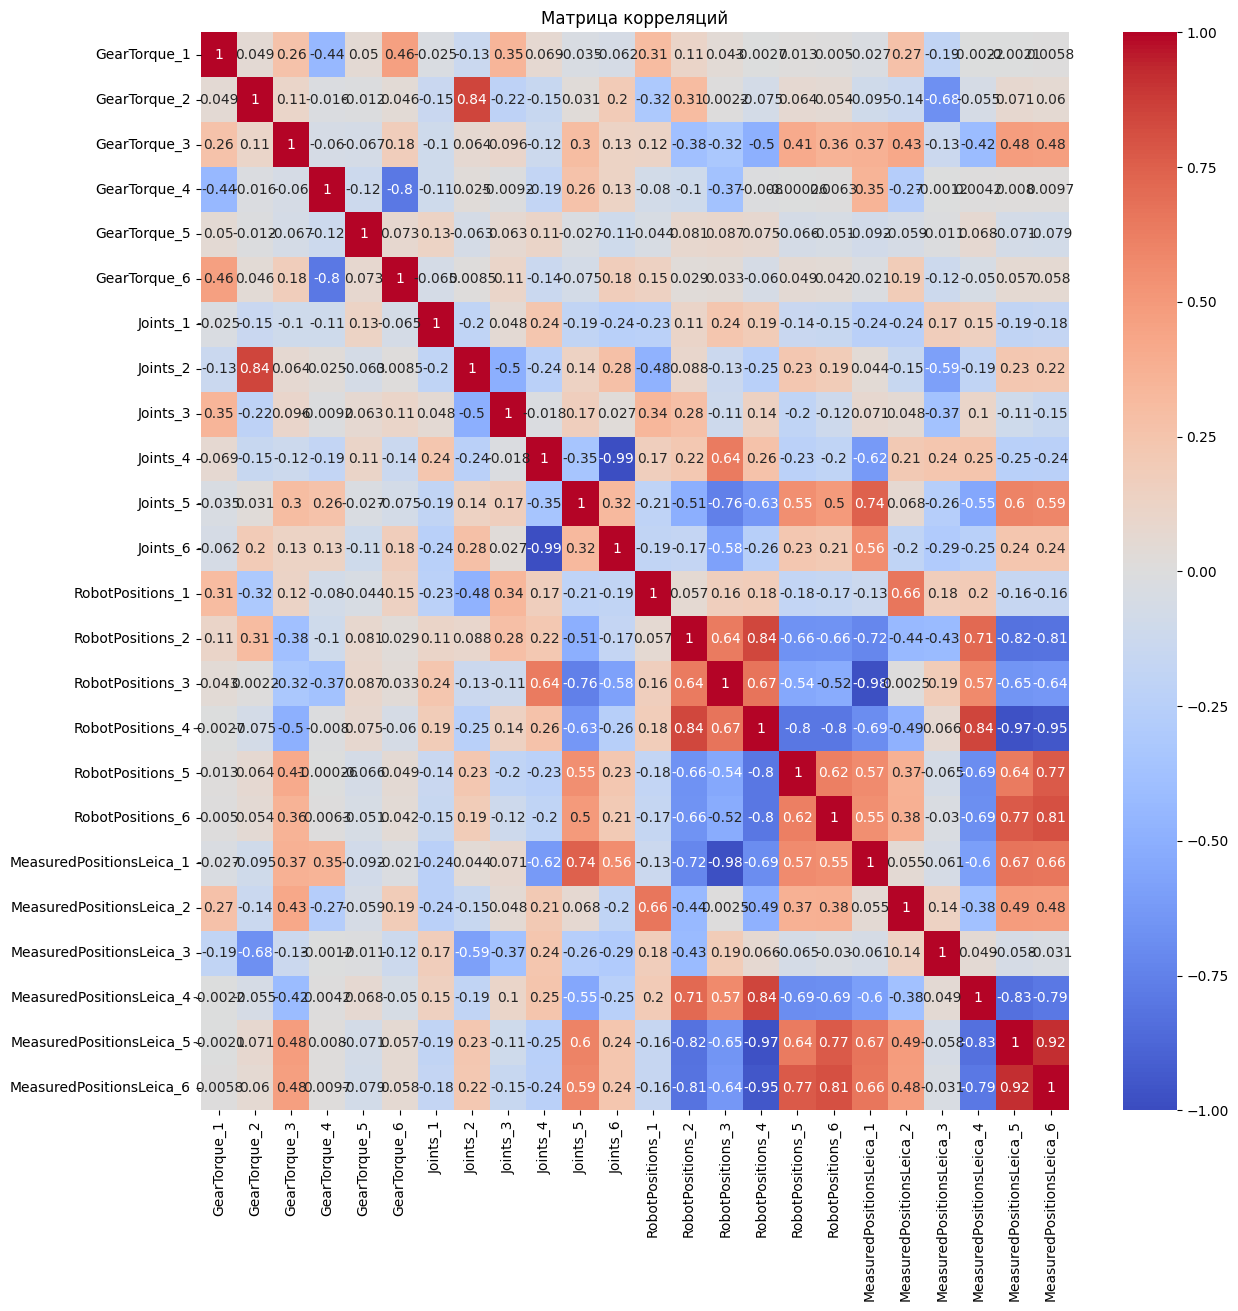

In [379]:

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = result.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Матрица корреляций")
plt.show()

# Create neural net

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LaserModel(nn.Module):
    def __init__(self):
        super(LaserModel, self).__init__()
        self.fc1 = nn.Linear(12, 64)   # Входной слой: 12 -> 64 нейрона
        self.fc2 = nn.Linear(64, 32)    # Скрытый слой 1: 64 -> 32 нейрона
        self.fc3 = nn.Linear(32, 6)     # Выходной слой: 16 -> 6 нейронов

    def forward(self, x):
        x = F.relu(self.fc1(x))        # Активация ReLU после первого слоя
        x = F.relu(self.fc2(x))        # Активация ReLU после второго слоя
        x = self.fc3(x)                # Выходной слой без активации
        return x

# Пример создания модели
model = LaserModel()

# Train model

In [398]:
criterion = nn.MSELoss()  # Функция потерь MSE
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Оптимизатор Adam
num_epochs = 250  # Количество эпох

In [399]:
train_data = TensorDataset(torch.FloatTensor(X_train.to_numpy()), torch.FloatTensor(y_train.to_numpy()))
test_data = TensorDataset(torch.FloatTensor(X_test.to_numpy()), torch.FloatTensor(y_test.to_numpy()))

# Создание DataLoader
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [400]:
for epoch in range(num_epochs):
    model.train()  # Режим обучения
    running_loss = 0.0
    
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Обнуляем градиенты
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward pass и оптимизация
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    # Вывод статистики
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

Epoch 1/250, Loss: 0.9538
Epoch 2/250, Loss: 0.8709
Epoch 3/250, Loss: 0.7820
Epoch 4/250, Loss: 0.6749
Epoch 5/250, Loss: 0.5660
Epoch 6/250, Loss: 0.4651
Epoch 7/250, Loss: 0.3835
Epoch 8/250, Loss: 0.3290
Epoch 9/250, Loss: 0.2921
Epoch 10/250, Loss: 0.2663
Epoch 11/250, Loss: 0.2469
Epoch 12/250, Loss: 0.2306
Epoch 13/250, Loss: 0.2160
Epoch 14/250, Loss: 0.2031
Epoch 15/250, Loss: 0.1921
Epoch 16/250, Loss: 0.1802
Epoch 17/250, Loss: 0.1709
Epoch 18/250, Loss: 0.1601
Epoch 19/250, Loss: 0.1514
Epoch 20/250, Loss: 0.1445
Epoch 21/250, Loss: 0.1351
Epoch 22/250, Loss: 0.1288
Epoch 23/250, Loss: 0.1212
Epoch 24/250, Loss: 0.1148
Epoch 25/250, Loss: 0.1100
Epoch 26/250, Loss: 0.1037
Epoch 27/250, Loss: 0.1004
Epoch 28/250, Loss: 0.0944
Epoch 29/250, Loss: 0.0908
Epoch 30/250, Loss: 0.0866
Epoch 31/250, Loss: 0.0832
Epoch 32/250, Loss: 0.0802
Epoch 33/250, Loss: 0.0772
Epoch 34/250, Loss: 0.0739
Epoch 35/250, Loss: 0.0725
Epoch 36/250, Loss: 0.0696
Epoch 37/250, Loss: 0.0668
Epoch 38/2

Metric               Feature 1    Feature 2    Feature 3    Feature 4     Feature 5     Feature 6   
----------------------------------------------------------------------------------------------------
R2                  0.9844        0.9812        0.9941        0.9282        0.9389        0.9190        
MSE                 0.0145        0.0161        0.0061        0.0634        0.0567        0.0740        
MAE                 0.0707        0.0827        0.0549        0.1028        0.0981        0.1135        
Explained Variance  0.9845        0.9812        0.9942        0.9286        0.9399        0.9190        


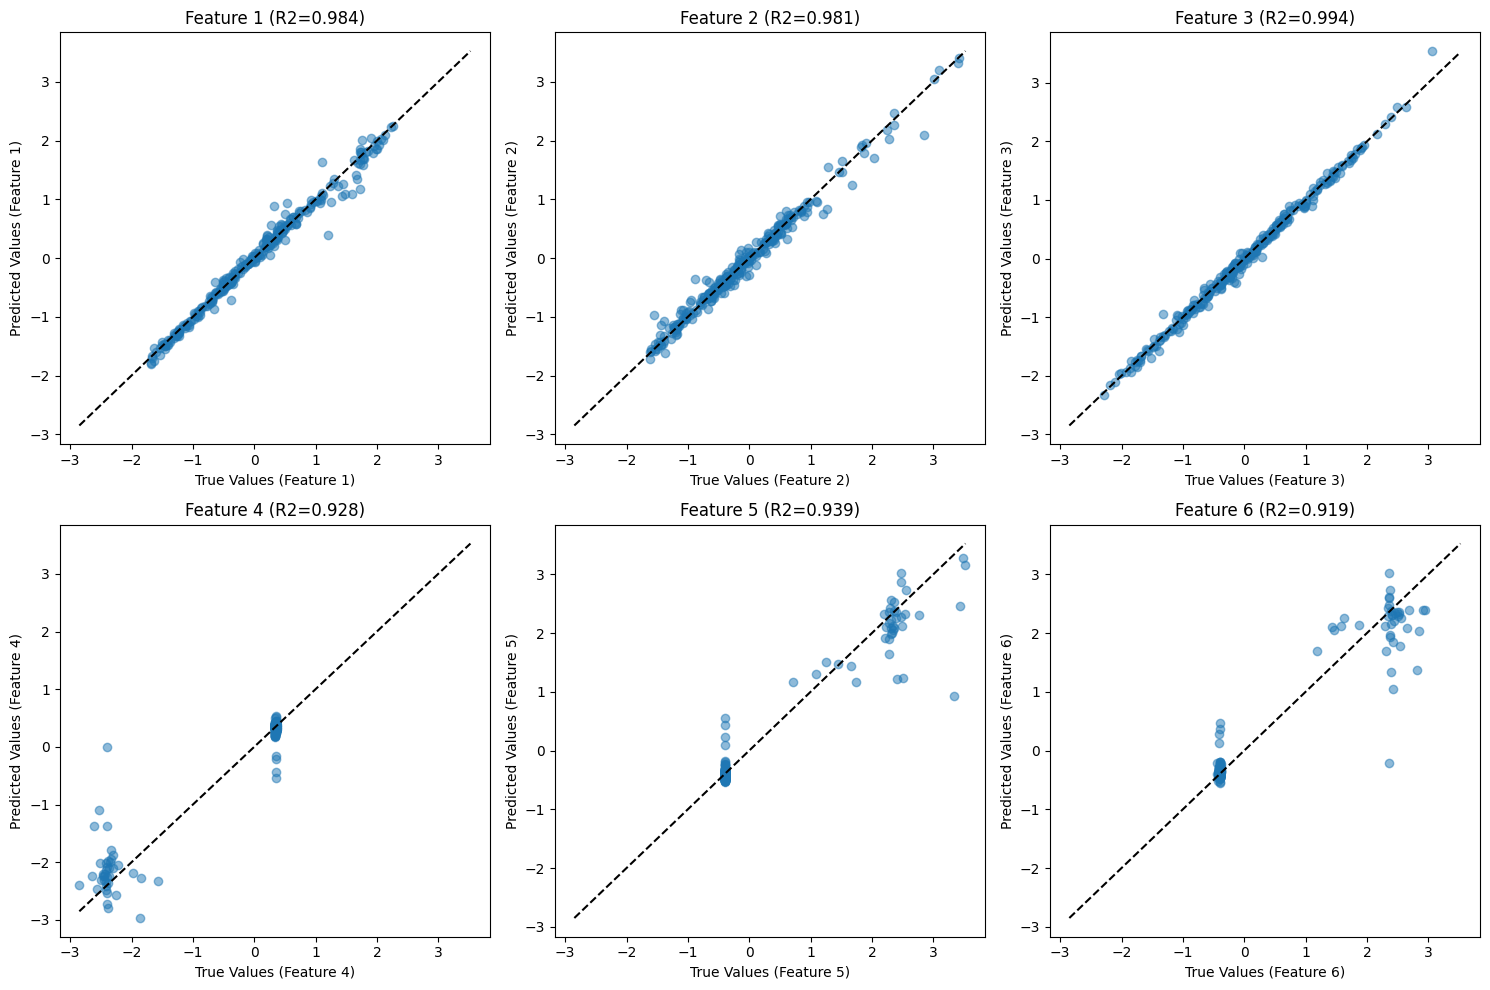


Дополнительные метрики:
Средний R2: 0.9576
Средний MSE: 0.0385
Средний MAE: 0.0871
Объясненная дисперсия: 0.9579


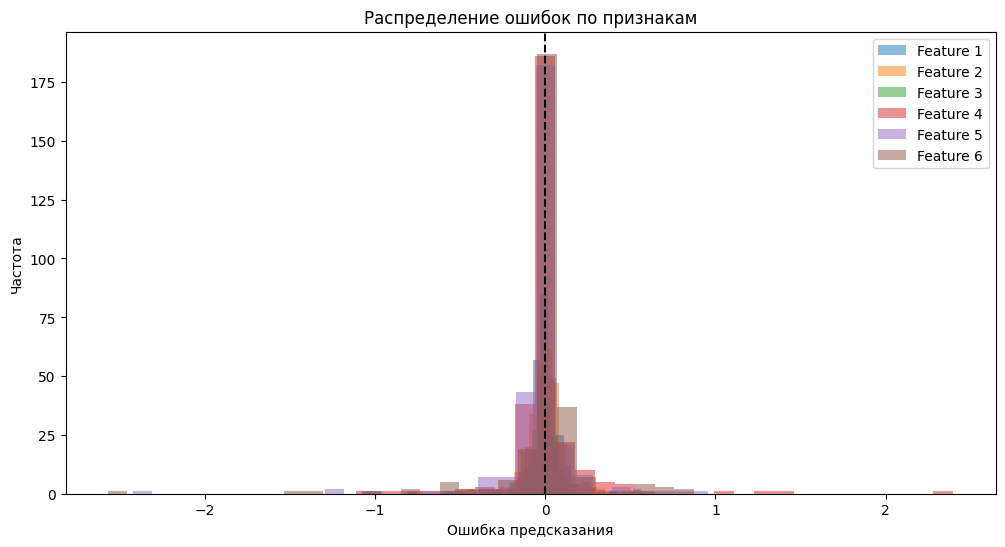

In [401]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

# 1. Предсказание на тестовых данных
model.eval()  # Переводим модель в режим оценки
all_targets = []
all_predictions = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        all_targets.append(targets.numpy())
        all_predictions.append(outputs.numpy())

# Конвертируем в numpy массивы
y_true = np.vstack(all_targets)
y_pred = np.vstack(all_predictions)

# 2. Вычисление метрик для каждого целевого признака
metrics = {
    'R2': r2_score,
    'MSE': mean_squared_error,
    'MAE': mean_absolute_error,
    'Explained Variance': explained_variance_score
}

results = {}
for metric_name, metric_fn in metrics.items():
    results[metric_name] = [metric_fn(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])]

# 3. Вывод результатов в таблице
print(f"{'Metric':<20} {'Feature 1':<12} {'Feature 2':<12} {'Feature 3':<12} {'Feature 4':<12}  {'Feature 5':<12}  {'Feature 6':<12}" )
print("-" * 100)
for metric, values in results.items():
    print(f"{metric:<20}", end="")
    for val in values:
        print(f"{val:.4f}".ljust(14), end="")
    print()

# 4. Визуализация результатов
plt.figure(figsize=(15, 10))

# График истинных vs предсказанных значений
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.scatter(y_true[:, i], y_pred[:, i], alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
    plt.xlabel(f'True Values (Feature {i+1})')
    plt.ylabel(f'Predicted Values (Feature {i+1})')
    plt.title(f'Feature {i+1} (R2={results["R2"][i]:.3f})')

plt.tight_layout()
plt.show()

# 5. Дополнительные метрики (по всем признакам)
print("\nДополнительные метрики:")
print(f"Средний R2: {np.mean(results['R2']):.4f}")
print(f"Средний MSE: {np.mean(results['MSE']):.4f}")
print(f"Средний MAE: {np.mean(results['MAE']):.4f}")
print(f"Объясненная дисперсия: {explained_variance_score(y_true, y_pred, multioutput='uniform_average'):.4f}")

# 6. Гистограмма ошибок
errors = y_pred - y_true
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.hist(errors[:, i], bins=30, alpha=0.5, label=f'Feature {i+1}')
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок по признакам')
plt.legend()
plt.show()